In [15]:
import meep as mp

In [16]:
cell = mp.Vector3(1.0, 1.0, 0)

In [17]:
geometry = [
    mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(0.01,0.25,0.0), material=mp.metal)
]

In [18]:
vol = mp.Volume(mp.Vector3(0.0,0.0,0.0), mp.Vector3(0.01,0.25,0.0))
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=10), component=mp.Ez, volume=vol, amplitude=10
    )
]

In [19]:
pml_layers = [mp.PML(0.1)]

In [20]:
resolution = 100

In [21]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

     block, center = (0,0,0)
          size (0.01,0.25,0)


          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000198126 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
     block, center = (0,0,0)
          size (0.01,0.25,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 0.00919795 s
-----------


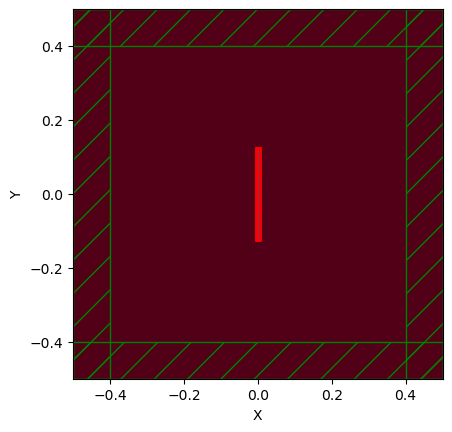

In [22]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [29]:
sim.run(mp.output_efield_z,until=1)

FloatProgress(value=1.0, description='0% done ', max=2.0, min=1.0)

creating output file "./ez-000000200.h5"...
on time step 200 (time=1), 3.11401 s/step
creating output file "./ez-000000201.h5"...
creating output file "./ez-000000202.h5"...
creating output file "./ez-000000203.h5"...
creating output file "./ez-000000204.h5"...
creating output file "./ez-000000205.h5"...
creating output file "./ez-000000206.h5"...
creating output file "./ez-000000207.h5"...
creating output file "./ez-000000208.h5"...
creating output file "./ez-000000209.h5"...
creating output file "./ez-000000210.h5"...
creating output file "./ez-000000211.h5"...
creating output file "./ez-000000212.h5"...
creating output file "./ez-000000213.h5"...
creating output file "./ez-000000214.h5"...
creating output file "./ez-000000215.h5"...
creating output file "./ez-000000216.h5"...
creating output file "./ez-000000217.h5"...
creating output file "./ez-000000218.h5"...
creating output file "./ez-000000219.h5"...
creating output file "./ez-000000220.h5"...
creating output file "./ez-0000002

     block, center = (0,0,0)
          size (0.01,0.25,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)


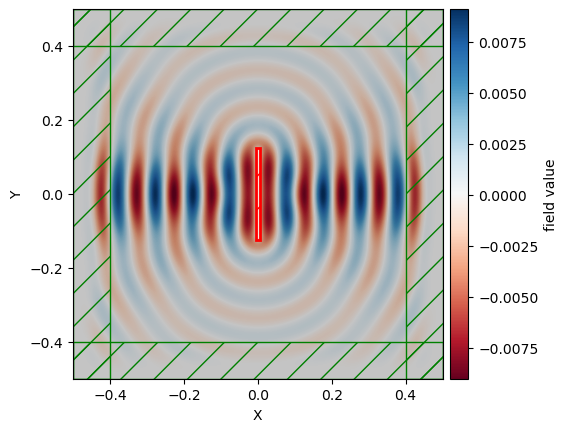

In [51]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez, field_parameters={"colorbar":True})
plt.show()

     block, center = (0,0,0)
          size (0.01,0.25,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)


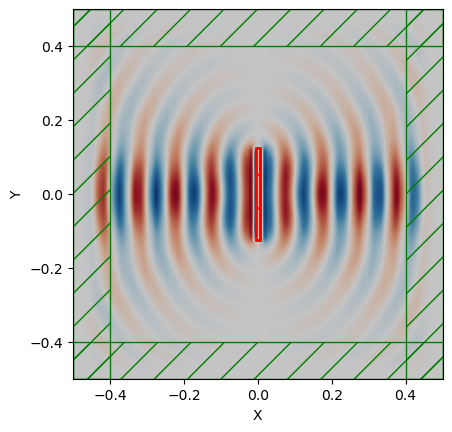

In [25]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Hy)
plt.show()

     block, center = (0,0,0)
          size (0.01,0.25,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)


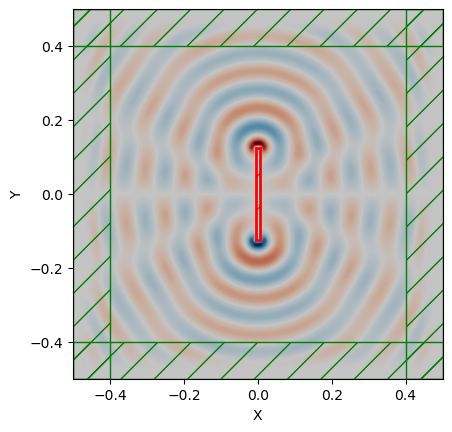

In [26]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Hx)
plt.show()

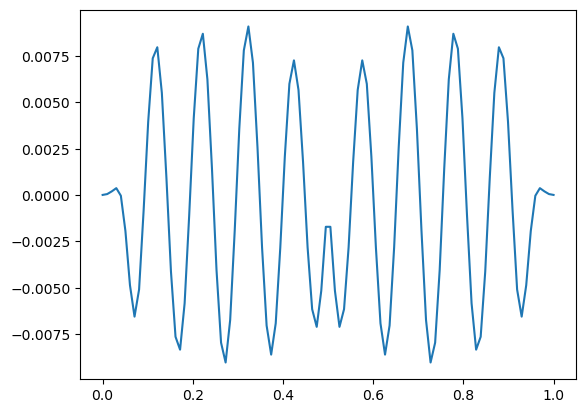

In [47]:
import h5py
import numpy as np
fn = "ez-000000400.h5"

def extract_single_kv_hdf(filename):
    with h5py.File(filename, "r") as f:
        a_group_key = list(f.keys())[0]
        ds_arr = f[a_group_key][()]
        return ds_arr

ds = extract_single_kv_hdf(fn)
plt.plot(np.linspace(0,1,100),ds[:,50])
